In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Відкриття нашого файлу Most Streamed Spotify Songs 2023

In [21]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023 (1).csv


In [28]:
df = pd.read_csv('spotify-2023.csv',encoding='cp1251')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# **Огляд даних для роботи над ними**

Подивимось на наші дані , перед роботою

Конвертуємо значення в streams у числові, нечислові перетворяться в NaN

In [35]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

Перевіримо, скільки таких проблемних рядків

In [36]:
print("Кількість нечислових значень у 'streams':", df['streams'].isna().sum())

Кількість нечислових значень у 'streams': 1


Виведемо тот самий проблемний рядок

In [38]:
print(df[df['streams'].isna()][['track_name', 'artist(s)_name']])

                              track_name     artist(s)_name
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse


In [39]:
df.iloc[[574]]


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,110,A,Major,53,75,69,7,0,17,3


В цьому рядку у нас NaN , тому ми додаємо правдиві дані , які знайшли в інтернеті та перевіряємо

In [41]:
df.loc[df['track_name'] == 'Love Grows (Where My Rosemary Goes)', 'streams'] = 200_000_000

In [42]:
df.iloc[[574]]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,200000000.0,16,...,110,A,Major,53,75,69,7,0,17,3


# **1.Тепер можемо вивести топ-10**

In [47]:
top_10 = df.sort_values(by='streams', ascending=False).head(10)
top_10

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2.713922e+09,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2.594040e+09,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2.591224e+09,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2.565530e+09,281,...,186,G,Major,68,49,59,16,0,13,28


Будуємо графік

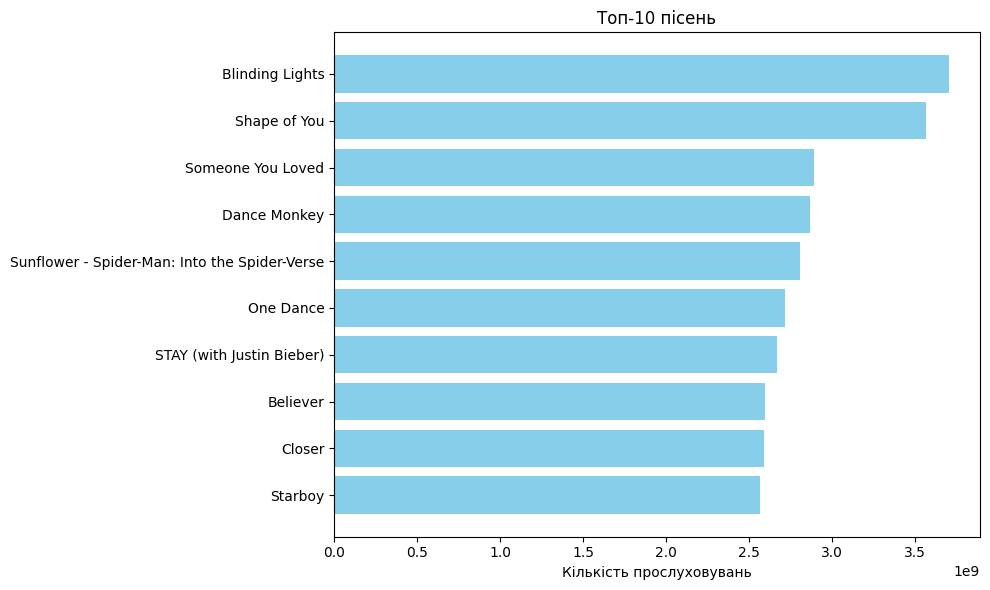

In [75]:
plt.figure(figsize=(10, 6))
plt.barh(top_10['track_name'], top_10['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.title('Топ-10 пісень')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **2. Кругова діаграма: Розподіл жанрів**

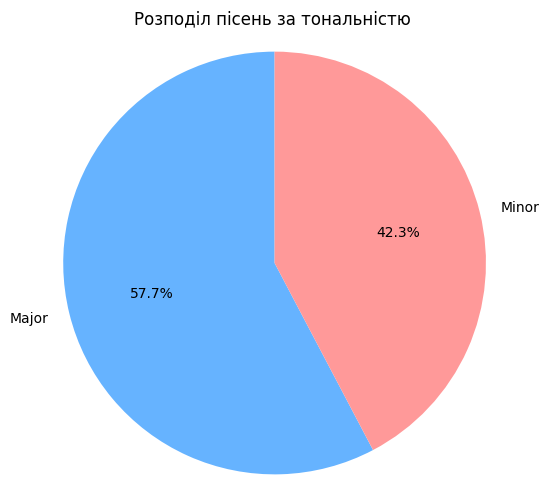

In [74]:
mode_counts = df['mode'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Розподіл пісень за тональністю ')
plt.axis('equal')
plt.show()

# **3.Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.**

Дивимось які роки у нас є

In [63]:
df['released_year'].unique()

array([2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 1999,
       2008, 1975, 2021, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983,
       1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958,
       1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986,
       2005, 1991, 1996, 1998, 1982, 1987])

Виводимо назви пісень та кількість прослуховувань для треків, випущених у 2023 році та обираємо один трек

In [65]:
tracks_2023 = df[df['released_year'] == 2023]
tracks_2023[['track_name', 'streams']]

,track_name,streams
0,Seven (feat. Latto) (Explicit Ver.),141381703.0
1,LALA,133716286.0
2,vampire,140003974.0
4,WHERE SHE GOES,303236322.0
5,Sprinter,183706234.0
...,...,...
381,I'm Not Here To Make Friends,103787664.0
382,TRUSTFALL,134255790.0
385,VIBE (feat. Jimin of BTS),152850295.0
398,MuпїЅпїЅ,120972253.0


 Фільтруємо дані для треку "VIBE (feat. Jimin of BTS)"

In [81]:
track_385 = df[df['track_name'] == 'VIBE (feat. Jimin of BTS)']
track_385

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295.0,15,...,100,NaN,Major,79,60,68,7,0,26,4


Очищаємо дані від пропусків або нечислових значень

In [82]:
track_385[platforms] = track_385[platforms].apply(pd.to_numeric, errors='coerce')

<ipython-input-82-a2c887ca2a6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_385[platforms] = track_385[platforms].apply(pd.to_numeric, errors='coerce')


Групуємо за платформами та отримуємо сумарну кількість прослуховувань для кожної

In [83]:
total_streams = track_385[platforms].sum()
total_streams

,0
in_spotify_playlists,415
in_apple_playlists,15
in_deezer_playlists,21
in_shazam_charts,15


Створюємо графік

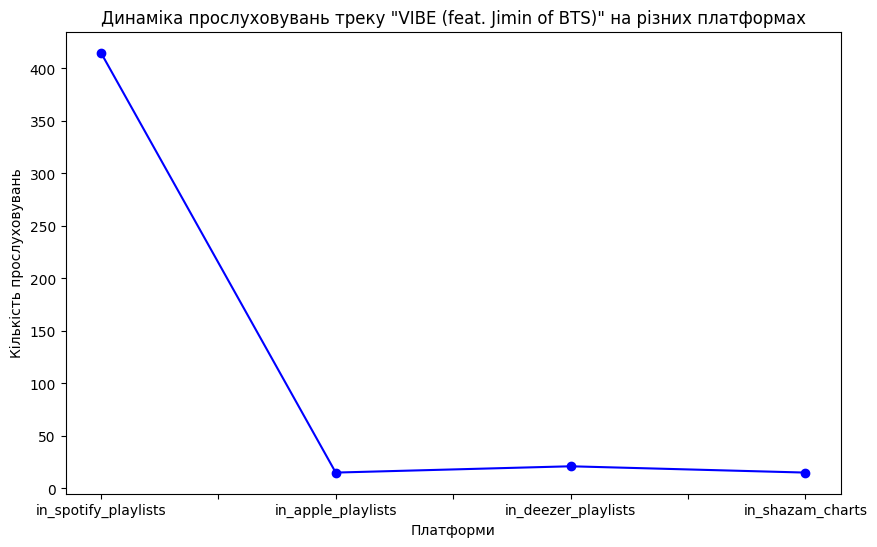

In [84]:
plt.figure(figsize=(10, 6))

total_streams.plot(kind='line', color='blue', marker='o')

plt.title('Динаміка прослуховувань треку "VIBE (feat. Jimin of BTS)" на різних платформах')
plt.xlabel('Платформи')
plt.ylabel('Кількість прослуховувань')

plt.grid(False)

plt.show()


# **4.Рейтинг артистів на Spotify**

Фільтруємо дані для 2023 року

In [76]:
df_2023 = df[df['released_year'] == 2023]
df_2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,I'm Not Here To Make Friends,"Sam Smith, Calvin Harris, Jessie Reyez",3,2023,1,27,1890,0,103787664.0,86,...,115,NaN,Major,70,84,90,17,0,41,6
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790.0,88,...,122,G#,Major,64,25,89,0,0,15,9
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295.0,15,...,100,NaN,Major,79,60,68,7,0,26,4
398,MuпїЅпїЅ,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253.0,33,...,90,A#,Minor,68,83,71,3,0,31,8


Групуємо за артистами та підсумовуємо кількість слухачів (streams)

In [77]:
artist_streams = df_2023.groupby('artist(s)_name')['streams'].sum()
artist_streams

,streams
artist(s)_name,
(G)I-DLE,96273746.0
"A$AP Rocky, Metro Boomin, Roisee",94186466.0
Agust D,118810253.0
"Ana Castela, AgroPlay",233801632.0
"Arcangel, Bizarrap",100409613.0
...,...
"Yahritza Y Su Esencia, Grupo Frontera",188933502.0
ZпїЅпїЅ Neto & Crist,145458418.0
"dennis, MC Kevin o Chris",111947664.0


 Сортуємо по кількості слухачів та беремо топ 10

In [78]:
top_10_artists = artist_streams.sort_values(ascending=False).head(10)
top_10_artists

,streams
artist(s)_name,
Miley Cyrus,1.316856e+09
Morgan Wallen,9.466940e+08
"Eslabon Armado, Peso Pluma",7.259801e+08
"Shakira, Bizarrap",7.219756e+08
Jimin,7.054457e+08
Fifty Fifty,6.364776e+08
"Karol G, Shakira",6.189904e+08
"Peso Pluma, Yng Lvcas",5.536341e+08
NewJeans,5.187948e+08


Створюємо стовпчикову діаграму

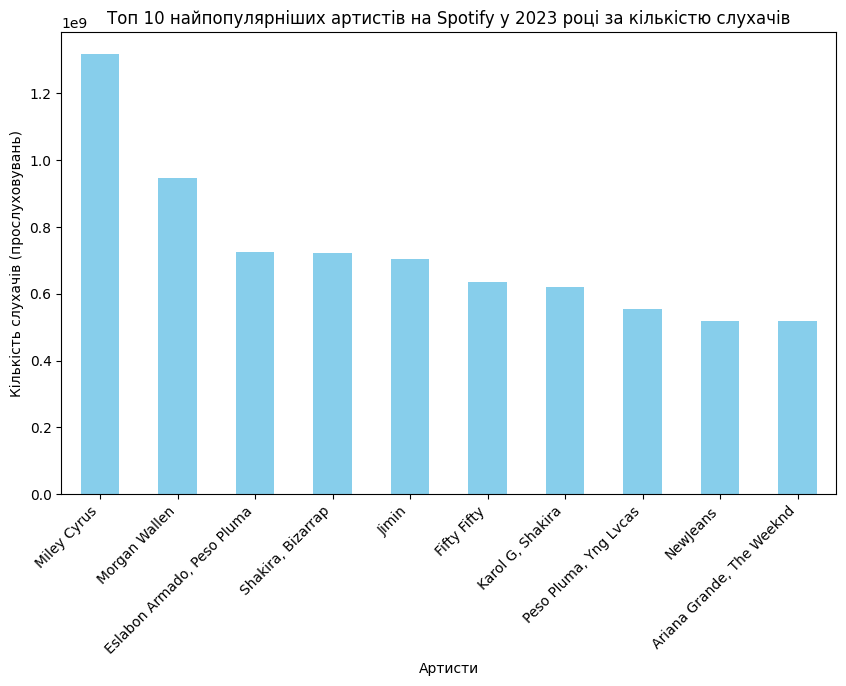

In [79]:
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='skyblue')

plt.title('Топ 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів')
plt.xlabel('Артисти')
plt.ylabel('Кількість слухачів (прослуховувань)')

plt.xticks(rotation=45, ha='right')
plt.show()


# **5.Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.**

Фільтруємо дані для 2023 року

In [85]:
df_2023 = df[df['released_year'] == 2023]
df_2023

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.0,67,...,141,C#,Major,92,66,58,19,0,8,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,I'm Not Here To Make Friends,"Sam Smith, Calvin Harris, Jessie Reyez",3,2023,1,27,1890,0,103787664.0,86,...,115,NaN,Major,70,84,90,17,0,41,6
382,TRUSTFALL,P!nk,1,2023,1,27,2098,16,134255790.0,88,...,122,G#,Major,64,25,89,0,0,15,9
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295.0,15,...,100,NaN,Major,79,60,68,7,0,26,4
398,MuпїЅпїЅ,"Steve Aoki, Tini, La Joaqui",3,2023,1,12,658,6,120972253.0,33,...,90,A#,Minor,68,83,71,3,0,31,8


Обираємо три конкретні треки за їх назвами

In [86]:
tracks = ['VIBE (feat. Jimin of BTS)', 'vampire', 'Seven (feat. Latto) (Explicit Ver.)']
tracks

['VIBE (feat. Jimin of BTS)', 'vampire', 'Seven (feat. Latto) (Explicit Ver.)']

Фільтруємо дані по цим трекам

In [87]:
df_tracks = df_2023[df_2023['track_name'].isin(tracks)]
df_tracks

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
385,VIBE (feat. Jimin of BTS),"TAEYANG, Jimin",2,2023,1,13,415,2,152850295.0,15,...,100,NaN,Major,79,60,68,7,0,26,4


Створюємо стовпчикову діаграму

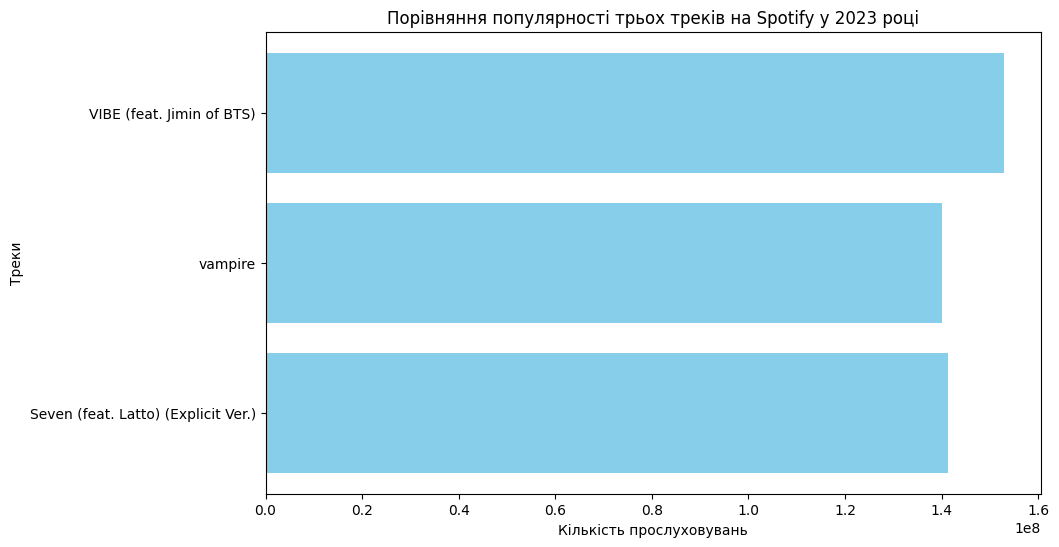

In [88]:
plt.figure(figsize=(10, 6))
plt.barh(df_tracks['track_name'], df_tracks['streams'], color='skyblue')

plt.title('Порівняння популярності трьох треків на Spotify у 2023 році')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Треки')

plt.show()

#Висновок:
1. Ми змогли висвітлити ТОП-10 , але пер цим ми профільтрували дані і замінили деякі дані
2. Далі у нас була Кругова діаграма: Розподіл жанрів , АЛЕ жанрів в наших даних немає , але ми взяли дані mode, це показує емоційний стан пісні і по цьому ми і зробили діаграму .
3. Роблячи лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року , ми теж не змогли його зробити бо дані не підходять , у нас не має такіх даних , томсу ми зробили динаміку прослуховувань на різних платформах одного треку , томсу мможу сказти , що на платформі спотіфай найбільше прослуховувань .
4. Також ми виводили популярні 3 треки , як виявилось найпопулярнішим вийшов VIBE (feat. Jimin of BTS)	, це трек всесвітньої популярної корейської к-поп групи .